# Introduction à l'apprentissage automatique: TP4 - Exercice 2 

<br>

### Reconnaissance d'images par SVM: la base de données Fashion-MNIST

<br>

Dans cet exercice, on travaille sur la base de données Fashion-MNIST, qui a l'"avantage" de fournir un problème de classification plus difficile que la base MNIST du TP précédent.

Commencez par lire la description de la base ici: https://www.openml.org/d/40996

Pour limiter les temps de calcul pendant le TP, nous allons nous limiter aux 10000 premières images de la base. La cellule suivante charge les données et prépare une base d'apprentissage et une base de test.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics, model_selection
%matplotlib inline 

# Fashion-Mnist database sur openML: (il faut une dizaine de secondes pour charger la base)
size_images=(28,28)
X_fashion, y_fashion = datasets.fetch_openml(data_id=40996, return_X_y=True, as_frame=False, parser='auto')
X_fashion=X_fashion[:10000,:]/255.  # normalisation des niveaux de gris entre 0 et 1
y_fashion=y_fashion[:10000]

for i in range(10):
    n=np.sum(y_fashion==str(i))
    print("nombre d'observations dans la classe %d: %d" %(i,n))

n_samples = len(X_fashion)
print("nombre total d'observations (apprentissage + test): %d" % n_samples)

n_features = len(X_fashion[0])
print("nombre de caractéristiques par observation: %d" % n_features)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_fashion, y_fashion, test_size=0.2, random_state=1)

print("nombre d'observations dans la base d'apprentissage: %d" %len(X_train))
print("nombre d'observations dans la base de test: %d" %len(X_test))


nombre d'observations dans la classe 0: 942
nombre d'observations dans la classe 1: 1027
nombre d'observations dans la classe 2: 1016
nombre d'observations dans la classe 3: 1019
nombre d'observations dans la classe 4: 974
nombre d'observations dans la classe 5: 989
nombre d'observations dans la classe 6: 1021
nombre d'observations dans la classe 7: 1022
nombre d'observations dans la classe 8: 990
nombre d'observations dans la classe 9: 1000
nombre total d'observations (apprentissage + test): 10000
nombre de caractéristiques par observation: 784
nombre d'observations dans la base d'apprentissage: 8000
nombre d'observations dans la base de test: 2000


La cellule suivante définit une fonction qui permet d'afficher les 150 premières images de la base de test, ainsi que la classe $c$ déterminée par l'algorithme de classification et la classe véritable $c'$ sous la forme $c/c'$.

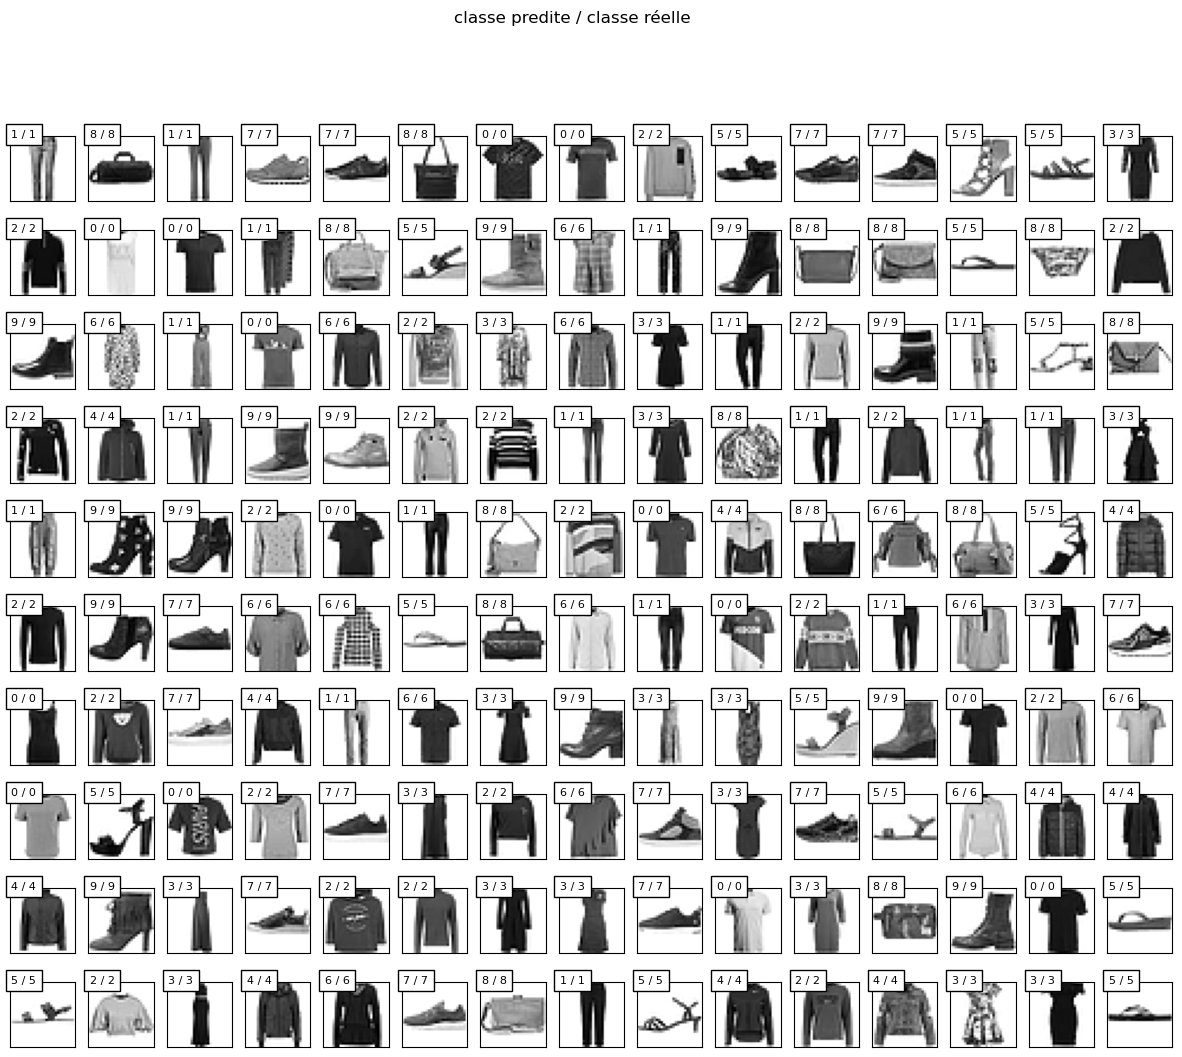

In [15]:
def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[15,12])   
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],size_images),cmap='gray_r')
        if y_pred[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=8,bbox=dict(facecolor='white', alpha=1))    
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=8,bbox=dict(facecolor='red', alpha=1))    
    plt.suptitle('classe predite / classe réelle')
    plt.show()
affichage_150_images(X_test, y_test, y_test)

__Questions__:

Testez les classifieurs SVM à noyau linéaire et à noyau RBF. Pour vous éviter le temps de calcul de `GridSearchCV` (plusieurs minutes ici, étant donnée la taille de la base d'apprentissage):
- pour le noyau linéaire, vous utiliserez la valeur $C=0.1$ 
- pour le noyau RBF, vous utiliserez la valeur de $\gamma$ par défaut et $C=10$.

Comparez les scores de classification sur la base de test de ces classifieurs aux scores de l'algorithme du plus proche voisin, des 5 plus proches voisins, à la classification bayésienne naïve gaussienne, et à la régression logistique (voir l'exercice 2 du TP3). Remarquez les bonnes performances des classifieurs linéaires, la mauvaise performance de GNB, et expliquez-les par les éléments du cours.

Comparez également les temps de calcul: ajoutez `%time` (il s'agit d'une _magic command_ jupyter) devant les lignes où vous exécutez `fit` et `predict̀`). 

Vous obtenez l'indication Wall qui est la durée réellement écoulée sur une horloge murale (_wall clock_), ainsi que la valeur "CPU" qui compte le temps de calcul total sur le CPU (en additionnant le temps de processus s'exécutant en parallèle sur les coeurs du processeurs). Comme tous les modèles de prédiction de `scikit-learn` ne bénéficient pas de la parallélisation sur plusieurs coeurs, seuls les temps d'exécution "CPU" sont réellement comparables.


Vous lirez dans la correction (à venir) une discussion sur le rôle des vecteurs supports (__facultatif__). 

In [7]:
from sklearn import svm, model_selection, neighbors, naive_bayes, linear_model

In [ ]:
# votre code pour SVM linear
SVM=svm.LinearSVC(kernel="linear", C=0.1)
%time SVM.fit(X_train,y_train)

CPU times: total: 1.59 s
Wall time: 4.44 s


LinearSVC(C=0.1)

In [23]:
# votre code pour SVM rbf
SVM=svm.SVC(kernel="rbf", C=10)
%time SVM.fit(X_train,y_train)

CPU times: total: 1 s
Wall time: 4.47 s


SVC(C=10)

In [10]:
# votre code pour 1-NN


In [11]:
# votre code pour 5-NN


In [12]:
# votre code pour GNB


In [13]:
# votre code pour RL


<font color=red>
    
Réponse:
    
</font>